<a href="https://colab.research.google.com/github/17251A0404/Abhigna_INFO5731_Spring2024/blob/main/INFO5731_Assignment_Four_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [9]:
#importe the necessary libaries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
df_sentiment = pd.read_csv('sentiment_dataset.csv')

# Replace 'text' with the actual column name containing text data in your dataset
Text = 'clean_text'

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer(max_df=0.85, max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df_sentiment[Text])

# Topic modeling using LDA
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display top words for each topic
features = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print([features[i] for i in topic.argsort()[:-11:-1]])
    print()

# Assign topics to documents
df_sentiment['topic'] = lda.transform(X).argmax(axis=1)

#Top 10 clusters for topic modeling
Top_clusters = df_sentiment['topic'].value_counts().head(10)
print("Top 10 Clusters:")
print(Top_clusters)

# Summarize and describe the topic for each cluster
for cluster, count in Top_clusters.items():
    cluster_df = df_sentiment[df_sentiment['topic'] == cluster]
    example_text = cluster_df[Text].iloc[0]  # Take an example document from the cluster
    print(f"\nCluster #{cluster + 1} Summary:")
    print(f"Example Text: {example_text}")
    print(f"Number of Documents in Cluster: {count}")
    print()

Topic #1:
['good', 'gladiator', 'maximus', 'movie', 'power', 'unwavering', 'film', 'emotional', 'soundtrack', 'emperor']

Topic #2:
['just', 'great', 'movie', 'fighting', 'ending', 'scenes', 'like', 'story', 'action', 'crowe']

Topic #3:
['film', 'movie', 'maximus', 'commodus', 'like', 'watch', 'tone', 'think', 'scott', 'story']

Topic #4:
['movie', 'mighty', 'time', 'history', 'rome', 'best', 'man', 'lot', 'fight', 'story']

Topic #5:
['maximus', 'gladiator', 'crowe', 'russell', 'film', 'emotional', 'powerful', 'justice', 'ridley', 'scott']

Topic #6:
['movie', 'film', 'say', 'best', 'just', 'watch', 'like', 'phoenix', 'joaquin', 'history']

Topic #7:
['movie', 'time', 'scenes', 'joaquin', 'ridley', 'scott', 'crowe', 'really', 'past', 'camera']

Topic #8:
['rome', 'epic', 'maximus', 'gladiator', 'movie', 'scene', 'great', 'honor', 'commodus', 'good']

Topic #9:
['film', 'gladiator', 'movie', 'story', 'fantastic', 'crowe', 'scott', 'acting', 'make', 'way']

Topic #10:
['gladiator', 'fi

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [6]:
# Write your code here
#Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset from assignment 3
df1 = pd.read_csv('sentiment_dataset.csv')

#Consider the two columns "clean_text" and "sentiment" which has reviews and sentiments respectively
X = df1['clean_text']
y = df1['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Using the SVM and Random Forest with 5-fold cross-validation as the two Sentiment classifiers.

# Support Vector Machine (SVM)
SVM_Classifier = SVC(kernel='linear', C=1)
SVM_Scores = cross_val_score(SVM_Classifier, X_train_tfidf, y_train, cv=5)
print("SVM Cross Validation Scores:", SVM_Scores)
print("SVM Mean Accuracy:", SVM_Scores.mean())

# Random Forest(rf)
RF_Classifier = RandomForestClassifier(n_estimators=100, random_state=42)
RF_Scores = cross_val_score(RF_Classifier, X_train_tfidf, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", RF_Scores)
print("Random Forest Mean Accuracy:", RF_Scores.mean())

# Train the classifiers on the training set
SVM_Classifier.fit(X_train_tfidf, y_train)
RF_Classifier.fit(X_train_tfidf, y_train)

# Evaluate on the test set
SVM_Predictions = SVM_Classifier.predict(tfidf_vectorizer.transform(X_test))
RF_Predictions = RF_Classifier.predict(tfidf_vectorizer.transform(X_test))

print("\nResults for Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, SVM_Predictions))
print("Classification Report:\n", classification_report(y_test, SVM_Predictions))

print("\nResults for Random Forest")
print("Accuracy:", accuracy_score(y_test, RF_Predictions))
print("Classification Report:\n", classification_report(y_test, RF_Predictions))

SVM Cross Validation Scores: [0.38125 0.3625  0.38125 0.325   0.41875]
SVM Mean Accuracy: 0.37374999999999997
Random Forest Cross-Validation Scores: [0.38125 0.35625 0.375   0.30625 0.4    ]
Random Forest Mean Accuracy: 0.36375

Results for Support Vector Machine
Accuracy: 0.29
Classification Report:
               precision    recall  f1-score   support

    negative       0.26      0.13      0.17        63
     neutral       0.28      0.34      0.31        76
    positive       0.32      0.39      0.35        61

    accuracy                           0.29       200
   macro avg       0.28      0.29      0.28       200
weighted avg       0.28      0.29      0.28       200


Results for Random Forest
Accuracy: 0.275
Classification Report:
               precision    recall  f1-score   support

    negative       0.23      0.17      0.20        63
     neutral       0.27      0.29      0.28        76
    positive       0.31      0.36      0.34        61

    accuracy                   

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Mean Squared Error:  964123189.3492607
R-squared:  0.8743047996516923
      Actual_Prices  Predicted_Prices  Percentage_Difference
892          154500     155071.487740               0.369895
1105         325000     351275.191208               8.084674
413          115000      93567.146424             -18.637264
522          159000     182355.550953              14.689026
1036         315500     341261.582052               8.165319
...             ...               ...                    ...
479           89471     100191.616522              11.982225
1361         260000     283503.528648               9.039819
802          189000     192654.212795               1.933446
651          108000      88765.296295             -17.809911
722          124500     125001.542127               0.402845

[292 rows x 3 columns]


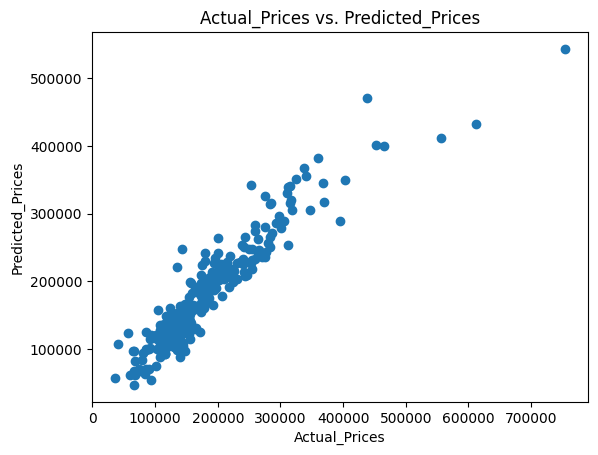

In [11]:
#importing the necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import io

#read the test and train data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Select features (explanatory variables) and target variable (house prices)
x = train_data.drop('SalePrice', axis=1)  # Features
y = train_data['SalePrice']  # Target variable

# Identify categorical columns
categorical_col = [cname for cname in x.columns if x[cname].dtype == "object"]

# Separate numerical and categorical columns
numerical_col = [cname for cname in x.columns if x[cname].dtype in ['int64', 'float64']]
X_numerical = x[numerical_col]
X_categorical = x[categorical_col]

# Use ColumnTransformer to apply one-hot encoding to categorical columns and impute missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_col),  # Impute missing values for numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_col)  # Handle unknown categories
    ])

# Create a linear regression model with one-hot encoding and imputation
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the testing set
y_prediction = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_prediction)
r_squared = r2_score(y_test, y_prediction)

print("Mean Squared Error: ", mse)
print("R-squared: " ,r_squared )

pd1 = ((y_prediction - y_test) / y_test) * 100

# Create DataFrame for actual prices, predicted prices, and percentage difference
results_df = pd.DataFrame({
    'Actual_Prices': y_test,
    'Predicted_Prices': y_prediction,
    'Percentage_Difference': pd1
})

# Display the DataFrame
print(results_df)

# Visualize the predicted vs. actual prices
plt.scatter(y_test, y_prediction)
plt.xlabel("Actual_Prices")
plt.ylabel("Predicted_Prices")
plt.title("Actual_Prices vs. Predicted_Prices")
plt.show()

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
df = pd.read_csv('sentiment_dataset.csv')

# Assuming you have 'User Reviews' and 'sentiment' columns
X = df['clean_text'].values
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values  # Convert 'positive' to 1, 'negative' to 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a subset for development
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # 2 for binary classification

# Tokenize and encode the text data
X_train_tokens = tokenizer(list(X_train), padding=True, truncation=True, return_tensors='pt', max_length=256)
X_test_tokens = tokenizer(list(X_test), padding=True, truncation=True, return_tensors='pt', max_length=256)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tokens['input_ids'], X_train_tokens['attention_mask'], torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(X_test_tokens['input_ids'], X_test_tokens['attention_mask'], torch.tensor(y_test, dtype=torch.long))

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Fine-tune the BERT model on your task (training loop)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

model.eval()
predictions = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=1)
        predicted_labels = torch.argmax(probabilities, dim=1)
        predictions.extend(predicted_labels.cpu().numpy())

# Calculate key metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f' The Accuracy: {accuracy:.4f}')
print(f'The Precision: {precision:.4f}')
print(f'The Recall: {recall:.4f}')
print(f'The F1 Score: {f1:.4f}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


 The Accuracy: 0.6950
The Precision: 0.0000
The Recall: 0.0000
The F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
